<a href="https://colab.research.google.com/github/saranyapalani/sample/blob/master/Forecasting%20Jewels%20theft%20and%20murder%20rate%20using%20facebook%20prophet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#PREDICTING JEWELS THEFT AND MURDER CRIME RATE USING FACEBOOK PROPHET

In [0]:
#importing datasets from google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load the packages

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load the datasets

In [0]:
data = pd.read_csv('/content/drive/My Drive/dataset.csv',error_bad_lines=False)
data.head()

,ID,Case Number,Date,Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05-03-2017 23:40,ROAD ACCIDENTS,APARTMENT,True,10,24.0,29.0,1154907.0,1893681.0,2017,05-10-2017 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05-03-2017 21:40,ROAD ACCIDENTS,RESIDENCE,False,3,20.0,42.0,1183066.0,1864330.0,2017,05-10-2017 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05-03-2017 23:31,PUBLIC PEACE VIOLATION,STREET,False,15,37.0,25.0,1140789.0,1904819.0,2017,05-10-2017 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05-03-2017 22:10,ROAD ACCIDENTS,SIDEWALK,False,15,28.0,25.0,1143223.0,1901475.0,2017,05-10-2017 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05-03-2017 22:00,JEWELS THEFT AND MURDER,RESIDENCE,False,15,28.0,25.0,1139890.0,1901675.0,2017,05-10-2017 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [0]:
#dropping unwanted columns

In [0]:
data.drop(['Case Number','X Coordinate', 'Y Coordinate','Updated On','Year','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)


In [0]:
data.head()

,ID,Date,Type,Location Description,Arrest
0,10508693,05-03-2017 23:40,ROAD ACCIDENTS,APARTMENT,True
1,10508695,05-03-2017 21:40,ROAD ACCIDENTS,RESIDENCE,False
2,10508697,05-03-2017 23:31,PUBLIC PEACE VIOLATION,STREET,False
3,10508698,05-03-2017 22:10,ROAD ACCIDENTS,SIDEWALK,False
4,10508699,05-03-2017 22:00,JEWELS THEFT AND MURDER,RESIDENCE,False


In [0]:
#Assembling a datetime by rearranging the dataframe column "Date"

In [0]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data.head()

,ID,Date,Type,Location Description,Arrest
0,10508693,2017-05-03 23:40:00,ROAD ACCIDENTS,APARTMENT,True
1,10508695,2017-05-03 21:40:00,ROAD ACCIDENTS,RESIDENCE,False
2,10508697,2017-05-03 23:31:00,PUBLIC PEACE VIOLATION,STREET,False
3,10508698,2017-05-03 22:10:00,ROAD ACCIDENTS,SIDEWALK,False
4,10508699,2017-05-03 22:00:00,JEWELS THEFT AND MURDER,RESIDENCE,False


In [0]:
#setting the index to be the date

In [0]:
data.index = pd.DatetimeIndex(data.Date)
data.head()

,ID,Date,Type,Location Description,Arrest
Date,,,,,
2017-05-03 23:40:00,10508693,2017-05-03 23:40:00,ROAD ACCIDENTS,APARTMENT,True
2017-05-03 21:40:00,10508695,2017-05-03 21:40:00,ROAD ACCIDENTS,RESIDENCE,False
2017-05-03 23:31:00,10508697,2017-05-03 23:31:00,PUBLIC PEACE VIOLATION,STREET,False
2017-05-03 22:10:00,10508698,2017-05-03 22:10:00,ROAD ACCIDENTS,SIDEWALK,False
2017-05-03 22:00:00,10508699,2017-05-03 22:00:00,JEWELS THEFT AND MURDER,RESIDENCE,False


In [0]:
#Crime type and their counts

In [0]:
data['Type'].value_counts()

JEWELS THEFT AND MURDER              109721
ROAD ACCIDENTS                        89025
NARCOTICS                             53952
CRIMINAL DAMAGE                       52571
ROBBERY                               43424
BURGLARY                              31493
ASSAULT                               30364
OTHER OFFENSE                         28377
DECEPTIVE PRACTICE                    21939
CRIMINAL TRESPASS                     12833
WEAPONS VIOLATION                      5889
PUBLIC PEACE VIOLATION                 4558
OFFENSE INVOLVING CHILDREN             3614
PROSTITUTION                           3250
CRIM SEXUAL ASSAULT                    2082
INTERFERENCE WITH PUBLIC OFFICER       1994
SEX OFFENSE                            1523
GAMBLING                                829
LIQUOR LAW VIOLATION                    813
ARSON                                   699
KIDNAPPING                              364
STALKING                                290
INTIMIDATION                    

In [0]:
#taking top 15 crime types and their counts

In [0]:
data['Type'].value_counts().iloc[:15]

JEWELS THEFT AND MURDER       109721
ROAD ACCIDENTS                 89025
NARCOTICS                      53952
CRIMINAL DAMAGE                52571
ROBBERY                        43424
BURGLARY                       31493
ASSAULT                        30364
OTHER OFFENSE                  28377
DECEPTIVE PRACTICE             21939
CRIMINAL TRESPASS              12833
WEAPONS VIOLATION               5889
PUBLIC PEACE VIOLATION          4558
OFFENSE INVOLVING CHILDREN      3614
PROSTITUTION                    3250
CRIM SEXUAL ASSAULT             2082
Name: Type, dtype: int64

In [0]:
#indexing the top 15 crimes

In [0]:
data['Type'].value_counts().iloc[:15].index

Index(['JEWELS THEFT AND MURDER', 'ROAD ACCIDENTS', 'NARCOTICS',
       'CRIMINAL DAMAGE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION',
       'CRIM SEXUAL ASSAULT'],
      dtype='object')

In [0]:
#plotting the crime types

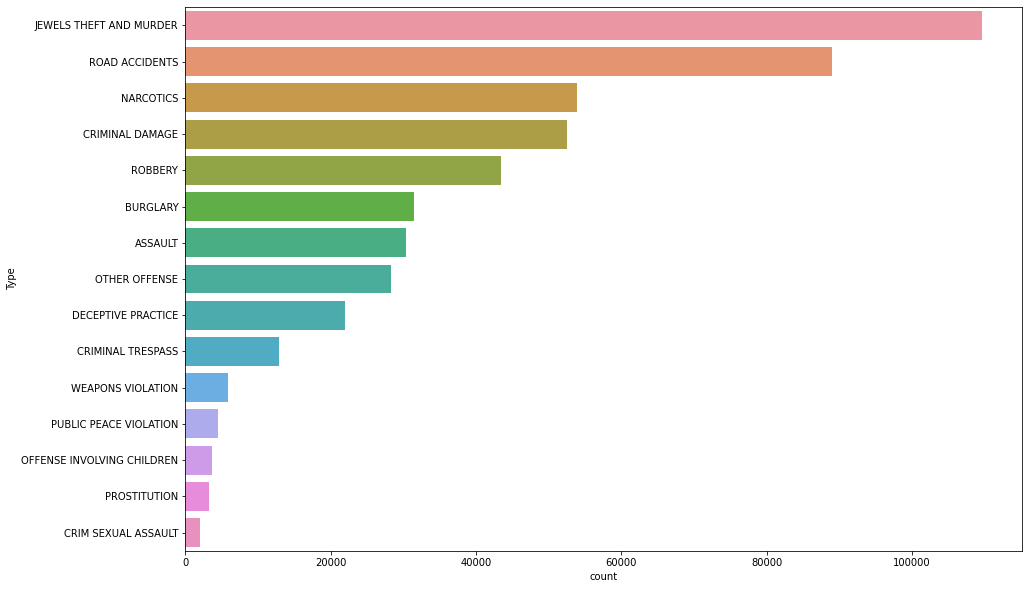

In [0]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Type', data = data, 
              order = data['Type'].value_counts().iloc[:15].index)


In [0]:
#plotting  the location

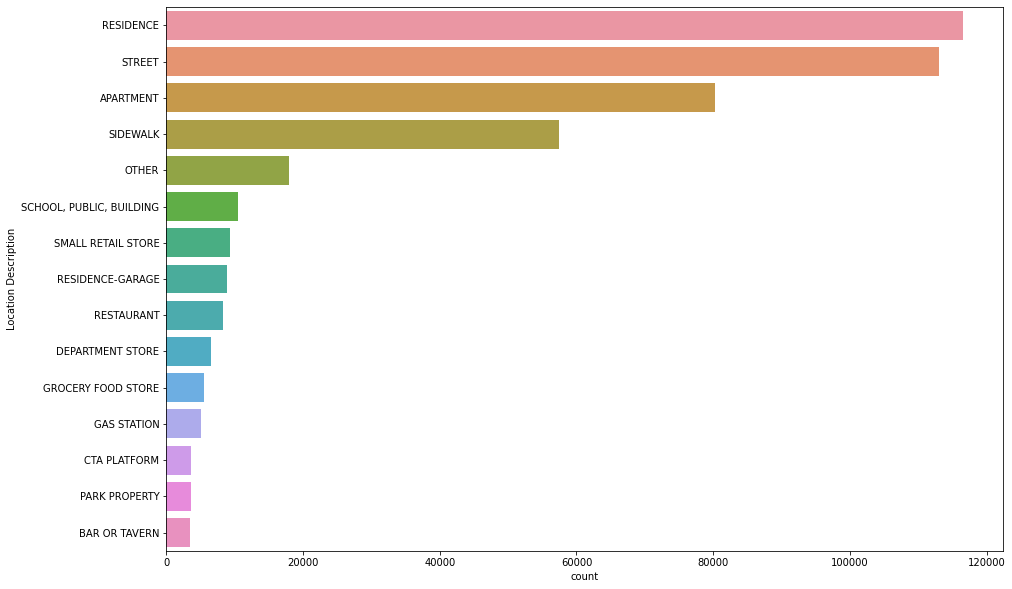

In [0]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = data, 
              order = data['Location Description'].value_counts().iloc[:15].index)


In [0]:
#From above graph,we can see that jewels theft and murder has the highest value compared to other crimes.
#So we are grouping only jewels theft and murder crime from rest of the crime types and making a forecast for next two years!

In [0]:
Groups = data.groupby(data['Type'])
Groups = dict(list(Groups))
theft_data = [Groups['JEWELS THEFT AND MURDER']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del data

In [0]:
#datasets containing only jewels theft and murder crime records

In [0]:
theft_data.head(5)

,ID,Date,Type,Location Description,Arrest
Date,,,,,
2017-05-03 22:00:00,10508699,2017-05-03 22:00:00,JEWELS THEFT AND MURDER,RESIDENCE,False
2017-05-03 17:30:00,10508717,2017-05-03 17:30:00,JEWELS THEFT AND MURDER,OTHER,False
2017-05-03 09:00:00,10508724,2017-05-03 09:00:00,JEWELS THEFT AND MURDER,STREET,False
2017-05-03 22:08:00,10508728,2017-05-03 22:08:00,JEWELS THEFT AND MURDER,STREET,False
2017-05-03 21:45:00,10508738,2017-05-03 21:45:00,JEWELS THEFT AND MURDER,STREET,False


In [0]:
#resampling the datasets year wise

In [0]:
theft_data.resample('Y').size()

Date
2014-12-31      881
2015-12-31     9646
2016-12-31     4991
2017-12-31       49
2018-12-31    74760
2019-12-31    19222
dtype: int64

In [0]:
#plotting crime count per year 

Text(0, 0.5, 'Number of Jewels theft and murder Crimes')

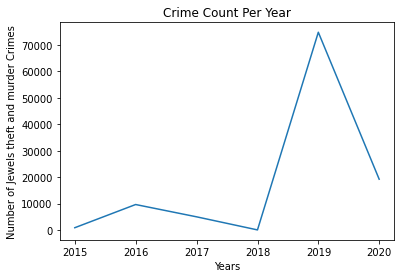

In [0]:
plt.plot(theft_data.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Jewels theft and murder Crimes')

In [0]:
#grouping the data into monthly records
#the datasets contain date and crime count per month columns

In [0]:
theft_prophet = theft_data.resample('M').size().reset_index()
theft_prophet.columns = ['Date', 'Crime Count']
theft_prophet.head()

,Date,Crime Count
0,2014-01-31,12
1,2014-02-28,10
2,2014-03-31,17
3,2014-04-30,56
4,2014-05-31,77


In [0]:
#dataframe

In [0]:
theft_prophet_df = pd.DataFrame(theft_prophet)
theft_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [0]:
#renaming the date column as ds and crime count column as y for timeseries forecasting

In [0]:
theft_prophet_data = theft_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
theft_prophet_data.head()

,ds,y
0,2014-01-31,12
1,2014-02-28,10
2,2014-03-31,17
3,2014-04-30,56
4,2014-05-31,77


In [0]:
#Time Series Forecasting

In [0]:
#Model Initialize

In [0]:
from fbprophet import Prophet
m = Prophet()

In [0]:
#adding weekly predictions

In [0]:
m.add_seasonality(name="weekly",period=7,fourier_order=5)

In [0]:
#dataset shape

In [0]:
theft_prophet_data.shape

(72, 2)

In [0]:
#Splitting the datasets into train and test

In [0]:
train = theft_prophet_data[:62]
test = theft_prophet_data[62:]

In [0]:
#train dataset

In [0]:
train

,ds,y
0,2014-01-31,12
1,2014-02-28,10
2,2014-03-31,17
3,2014-04-30,56
4,2014-05-31,77
...,...,...
57,2018-10-31,6348
58,2018-11-30,6010
59,2018-12-31,5780
60,2019-01-31,5292


In [0]:
#fit model

In [0]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#future dates for next two years

In [0]:
future = m.make_future_dataframe(periods=730)
future

,ds
0,2014-01-31
1,2014-02-28
2,2014-03-31
3,2014-04-30
4,2014-05-31
...,...
787,2021-02-23
788,2021-02-24
789,2021-02-25
790,2021-02-26


In [0]:
#forecasting the future

In [0]:
forecast = m.predict(future)

In [0]:
#The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [0]:
forecast[['ds','trend','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,trend,yhat,yhat_lower,yhat_upper
787,2021-02-23,6439.448979,12693.216090,10480.282753,14888.173065
788,2021-02-24,6442.657021,11604.029401,9283.642508,13820.772626
789,2021-02-25,6445.865063,9635.986211,7398.297562,12028.347468
790,2021-02-26,6449.073106,9139.173528,6733.349161,11492.837082
791,2021-02-27,6452.281148,9079.088773,6698.535516,11448.342226


In [0]:
#plotting the forecast
#dotted lines represent the actual values and blue color represents predicted values 

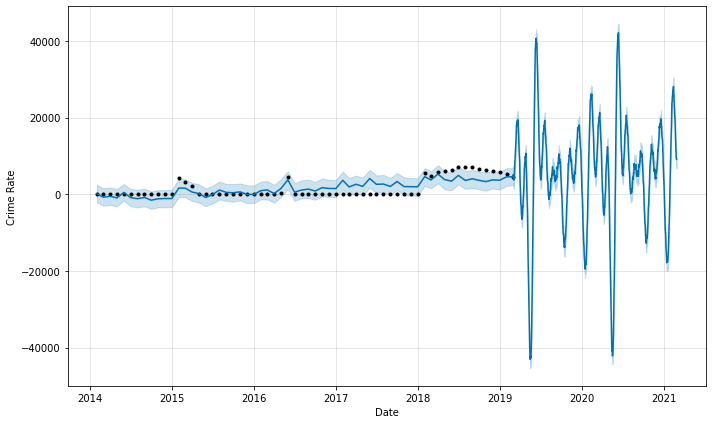

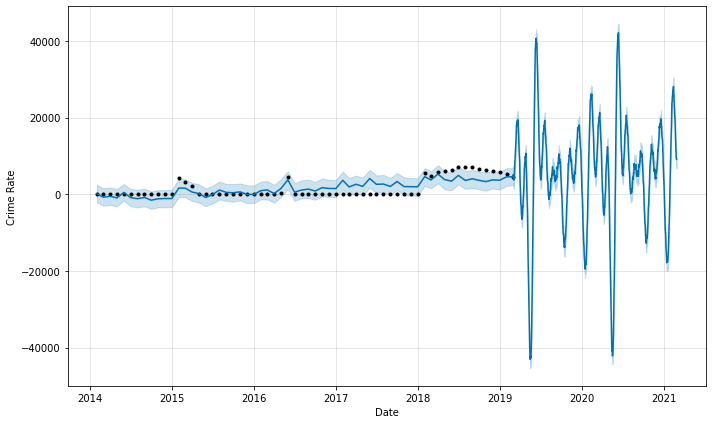

In [0]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

In [0]:
#plotting forecast year wise,week wise and month wise

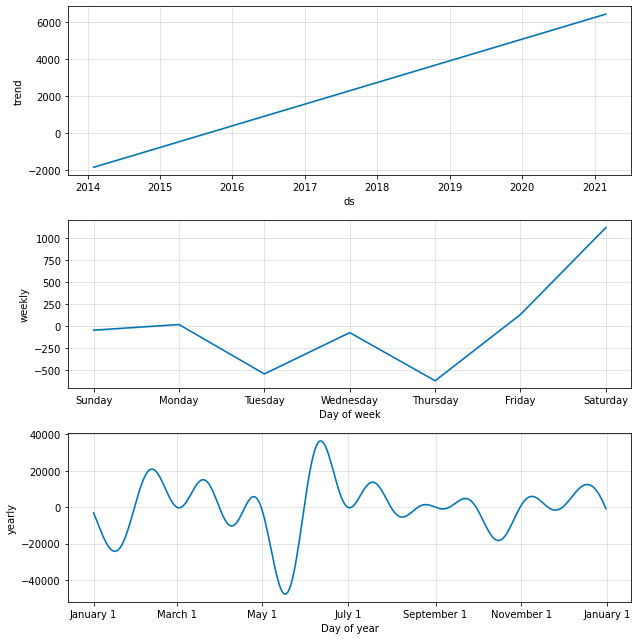

In [0]:
fig=m.plot_components(forecast)

In [0]:
#test datasets

In [0]:
test

,ds,y
62,2019-03-31,5096
63,2019-04-30,4091
64,2019-05-31,21
65,2019-06-30,26
66,2019-07-31,21
67,2019-08-31,20
68,2019-09-30,27
69,2019-10-31,52
70,2019-11-30,69
71,2019-12-31,121


In [0]:
#plotting the testing data

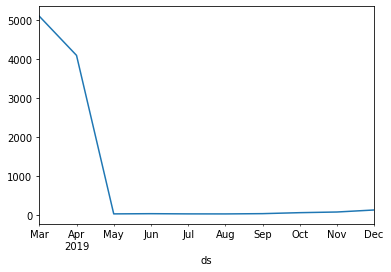

In [0]:
test = test.set_index("ds")
test = test['y']
import matplotlib.pyplot as plt
test.plot()


In [0]:
#Trend changepoints
#Find Point/Dates For Change

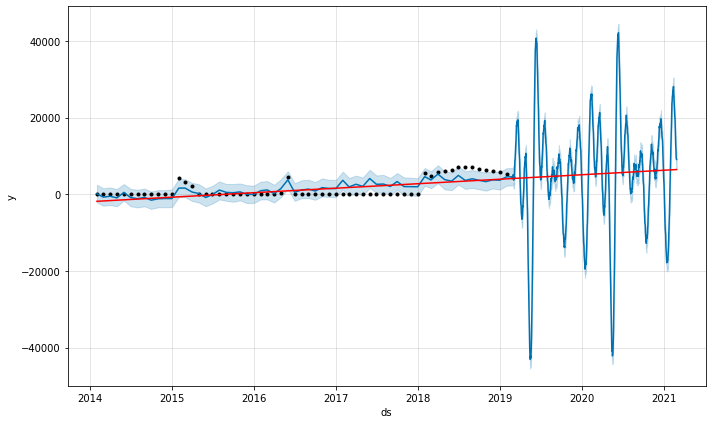

In [0]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
c = add_changepoints_to_plot(fig.gca(),m,forecast)

In [0]:
#The above graph represents the prediction for Jewels theft and murder crime for the year 2014 to 2019 and made a future prediction for the years 2020 and 2021.
#The black dotted lines represent the actual values and blue lines represent the predicted values.
#The red line represents the trend changepoint at which the rate is allowed to change.
#From the above forecast,we can see that crime rate is expected to rise in the mid of 2020 and 2021 and there will be times where crime rate will be low as well.
#We can see that our predicted values quite matches with actual values,hence our model will prove efficient for foreseeing the future.
